https://github.com/kdemertzis/EKPA/blob/main/IDS_example.py

In [29]:
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import os
from tensorflow.keras.utils import to_categorical
from sklearn.utils import class_weight
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
## from models import models_ddos

MODELS

In [9]:
from tensorflow.keras.layers import Flatten,Dense, Input, Dropout, Conv1D, AvgPool1D
from tensorflow.keras.models import Model
from tensorflow.keras import optimizers,layers,losses


#------------------------------------------------------------------------------
# LSTM
#------------------------------------------------------------------------------
class Models_DDOS:
    def model_lstm(lr=1e-4,N=64,inshape=40,nclass=12):
        in1=Input(shape=(inshape,1))
        x=layers.LSTM(N, activation='tanh')(in1)
        x=Dropout(0.1)(x)
        x=Dense(128, activation='relu')(x)
        out1=Dense(nclass, activation='softmax')(x)
        model=Model(inputs=in1,outputs=out1)

        model.compile(optimizer=optimizers.Adam(lr),
                loss=losses.categorical_crossentropy,
                metrics=['acc'])
        return model

    #------------------------------------------------------------------------------
    #CONV1D
    #------------------------------------------------------------------------------

    def model_conv1D(lr=1e-4,N=64,inshape=40,nclass=12):
        in1=Input(shape=(inshape,1))
        x=Conv1D(N, 3,padding='same',activation='relu')(in1)
        x=Conv1D(N, 3,padding='same',activation='relu')(x)

        x=layers.Flatten()(x)
        x=Dropout(0.1)(x)
        x=Dense(128, activation='relu')(x)
        out1=Dense(nclass, activation='softmax')(x)
        model=Model(inputs=in1,outputs=out1)

        model.compile(optimizer=optimizers.Adam(lr),
                loss=losses.categorical_crossentropy,
                metrics=['acc'])
        return model


    #------------------------------------------------------------------------------
    # DENSE
    #------------------------------------------------------------------------------

    def model_dense(lr=1e-4,N=64,inshape=40,nclass=12):
        in1=Input(shape=(inshape,1))
        x=Dense(N,activation='relu')(in1)
        x=Dense(N,activation='relu')(x)
        x=layers.Flatten()(x)
        x=Dropout(0.1)(x)
        x=Dense(128, activation='relu')(x)
        out1=Dense(nclass, activation='softmax')(x)
        model=Model(inputs=in1,outputs=out1)

        model.compile(optimizer=optimizers.Adam(lr),
                loss=losses.categorical_crossentropy,
                metrics=['acc'])
        return model

    #------------------------------------------------------------------------------
    # BASE LINE models
    #------------------------------------------------------------------------------
    def model_conv1D_large(nfeat=40,lr=1e-2,nclass=12):
        in1=Input(shape=(nfeat,1))
        x=Conv1D(64, 3,padding='same' ,activation='relu')(in1)
        x=Conv1D(64, 3,padding='same' ,activation='relu')(x)
        x=AvgPool1D()(x)
        x=Conv1D(128,5,padding='same' ,activation='relu')(x)
        x=AvgPool1D()(x)
        x=Conv1D(256,7,padding='same'  ,activation='relu')(x)
        x=AvgPool1D()(x)
        x=Conv1D(512,9,padding='same' ,activation='relu')(x)
        x=Flatten()(x)
        x=Dropout(0.4)(x)
        x=Dense(512, activation='relu')(x)
        output=Dense(nclass, activation='softmax')(x)
        model = Model(inputs=in1, outputs=output)

        #opt=optimizers.SGD(lr)
        opt=optimizers.Adam(lr)
        # opt=optimizers.RMSprop(lr)
        # opt=optimizers.Adam(lr)
        #opt=optimizers.Nadam(2e-2)
        model.compile(optimizer=opt,#Adam(lr=1e-2),
                loss=losses.categorical_crossentropy,
                metrics=['acc'])
        return model

    def model_conv1D_binary(nfeat=32,lr=1e-2,nclass=12):
        in1=Input(shape=(nfeat,1))
        x=Conv1D(64, 3,padding='same' ,activation='relu')(in1)
        x=Conv1D(64, 3,padding='same' ,activation='relu')(x)
        x=AvgPool1D()(x)
        x=Conv1D(128,5,padding='same' ,activation='relu')(x)
        x=AvgPool1D()(x)
        x=Conv1D(256,7,padding='same'  ,activation='relu')(x)
        x=AvgPool1D()(x)
        x=Conv1D(512,9,padding='same' ,activation='relu')(x)
        x=Flatten()(x)
        x=Dropout(0.2)(x)
        x=Dense(512, activation='relu')(x)
        output=Dense(nclass, activation='sigmoid')(x)
        model = Model(inputs=in1, outputs=output)

        #opt=optimizers.SGD(lr)
        # opt=optimizers.Adam(lr)
        opt=optimizers.RMSprop(lr)
        # opt=optimizers.Adam(lr)
        #opt=optimizers.Nadam(2e-2)
        model.compile(optimizer=opt,#Adam(lr=1e-2),
                loss=losses.binary_crossentropy,
                metrics=['acc'])
        return model

IDS EXAMPLE

In [10]:
epochs = 100
nclass = 12

In [11]:
# φόρτωση συνόλου δεδομένων
url = "https://raw.githubusercontent.com/kdemertzis/EKPA/main/Data/pcap_data.csv"
data = pd.read_csv(url)

In [12]:
# διαχωρισμός ανεξάρτητων και εξαρτημένων μεταβλητών
## Μελετώντας το σύνολο δεδομένων ότι η στήλη που αναπαριστά την ταξινόμηση κάθε στοιχείου ονομάζεται "target"
X = data.drop("target", axis = 1)
y = data["target"]

In [13]:
# διαχωρισμός συνόλου δεδομένων σε σύνολο εκπαίδευσης και δοκιμών
## Ως συνήθως επιλέγεται μέγεθος test set το 20% του συνόλου
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## Από το 80% του train, το 10% θα χρησιμοποιηθεί για validation
train_data, val_data, train_label, val_label = train_test_split(X_train, y_train, test_size=0.125, stratify=y_train)

<ipython-input-35-49c038285681>:2: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  count_classes = pd.value_counts(data['target'], sort = True)


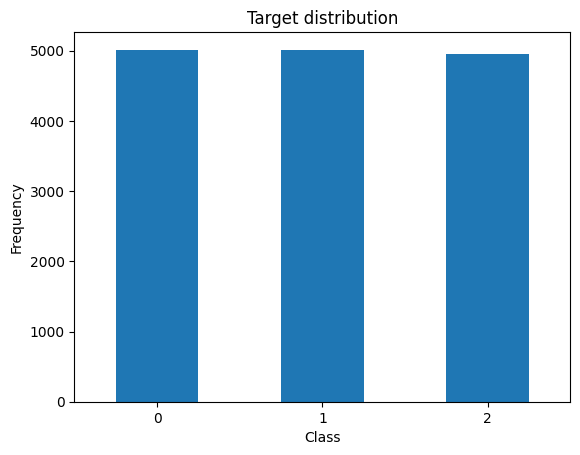

In [35]:
# κατανομή της εξαρτημένης μεταβλητής (target)
count_classes = pd.value_counts(data['target'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Target distribution")
plt.xticks(range(3), ['0', '1', '2'])
plt.xlabel("Class")
plt.ylabel("Frequency");

In [15]:
# to_categorical
train_label = to_categorical(train_label, nclass)
val_label   = to_categorical(val_label,   nclass)
test_label  = to_categorical(y_test,  nclass)

print('train_data.shape=', train_data.shape)
print('test_data.shape=',  X_test.shape)
print('test_data.shape=',  val_data.shape)

train_data.shape= (10476, 25)
test_data.shape= (2994, 25)
test_data.shape= (1497, 25)


In [16]:
#get the number of features
inshape=train_data.shape[1]

In [18]:
# -- Baseline models-----------------------------------------------------------

# -- Conv1d
model1=Models_DDOS.model_conv1D(lr=1e-4,N=64,inshape=inshape)
# -- Dense
model2=Models_DDOS.model_dense(lr=1e-4,N=64,inshape=inshape)
# -- LSTM
model3=Models_DDOS.model_lstm(lr=1e-4,N=64,inshape=inshape)

MODEL 1

In [19]:
model1.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 25, 1)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d (Conv1D)                      │ (None, 25, 64)              │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 25, 64)              │          12,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 12)                  │           1,548 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 219,084 (855.80 KB)

 Trainable params: 219,084 (855.80 KB)

 Non-trainable params: 0 (0.00 B)

In [23]:
# -- TRAIN MODEL 1 --------------------------------------------------------------
history1 = model1.fit(train_data,
                    train_label,
                    shuffle=True,
                    epochs=epochs,
                    batch_size=256,
                    validation_data=(val_data, val_label)
                    )

Epoch 1/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 10s 100ms/step - acc: 0.4127 - loss: 1.8417 - val_acc: 0.8076 - val_loss: 0.7841
Epoch 2/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 64ms/step - acc: 0.8264 - loss: 0.6746 - val_acc: 0.8397 - val_loss: 0.5221
Epoch 3/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 6s 83ms/step - acc: 0.8586 - loss: 0.4826 - val_acc: 0.8490 - val_loss: 0.4840
Epoch 4/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 64ms/step - acc: 0.8734 - loss: 0.4355 - val_acc: 0.8570 - val_loss: 0.4679
Epoch 5/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 6s 80ms/step - acc: 0.8726 - loss: 0.4259 - val_acc: 0.8664 - val_loss: 0.4562
Epoch 6/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 65ms/step - acc: 0.8861 - loss: 0.4126 - val_acc: 0.8717 - val_loss: 0.4501
Epoch 7/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 4s 90ms/step - acc: 0.8889 - loss: 0.4019 - val_acc: 0.8724 - val_loss: 0.4451
Epoch 8/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 63ms/step - acc: 0.8997 - loss: 0.3864 - val_acc: 0.8751 - val_loss: 0.4429
Epoch 9/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - 

In [24]:
pred = model1.predict(X_test)
predictions = pred.argmax(axis=-1)

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [27]:
test_label

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [28]:
predictions

array([1, 1, 2, ..., 0, 2, 0])

Average accuracy:  0.924181696726787


<Axes: >

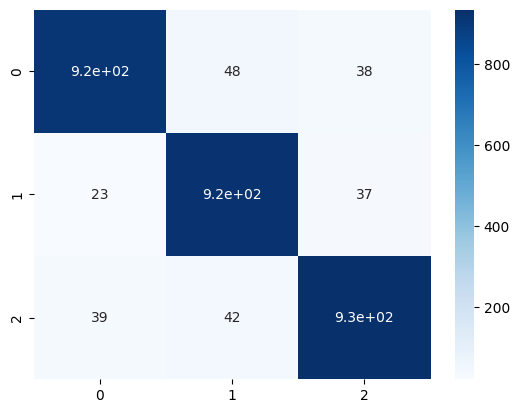

In [33]:
# υπολογισμός μετρικών αξιολόγησης (accuracy, precision, recall, f-score, confusion matrix)
accuracy = accuracy_score(y_test, predictions)
print("Average accuracy: ", accuracy)
cnfm = confusion_matrix(y_test.astype('int32'), predictions)
sns.heatmap(cnfm, annot = True, cmap = "Blues")

MODEL 2

In [20]:
model2.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 25, 1)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 25, 64)              │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 25, 64)              │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 12)                  │           1,548 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 210,764 (823.30 KB)

 Trainable params: 210,764 (823.30 KB)

 Non-trainable params: 0 (0.00 B)

In [34]:
# -- TRAIN MODEL 2 --------------------------------------------------------------
history2 = model2.fit(train_data,
                    train_label,
                    shuffle=True,
                    epochs=epochs,
                    batch_size=256,
                    validation_data=(val_data, val_label)
                    )

Epoch 1/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - acc: 0.2836 - loss: 2.1384 - val_acc: 0.7315 - val_loss: 1.0893
Epoch 2/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - acc: 0.7912 - loss: 0.9153 - val_acc: 0.8076 - val_loss: 0.6298
Epoch 3/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step - acc: 0.8341 - loss: 0.5858 - val_acc: 0.8343 - val_loss: 0.5468
Epoch 4/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - acc: 0.8483 - loss: 0.5016 - val_acc: 0.8444 - val_loss: 0.5218
Epoch 5/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - acc: 0.8620 - loss: 0.4690 - val_acc: 0.8450 - val_loss: 0.5111
Epoch 6/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - acc: 0.8642 - loss: 0.4649 - val_acc: 0.8524 - val_loss: 0.5026
Epoch 7/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - acc: 0.8761 - loss: 0.4292 - val_acc: 0.8637 - val_loss: 0.4957
Epoch 8/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - acc: 0.8756 - loss: 0.4452 - val_acc: 0.8617 - val_loss: 0.4850
Epoch 9/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - ac

In [36]:
pred = model2.predict(X_test)
predictions = pred.argmax(axis=-1)

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


Average accuracy:  0.916499665998664


<Axes: >

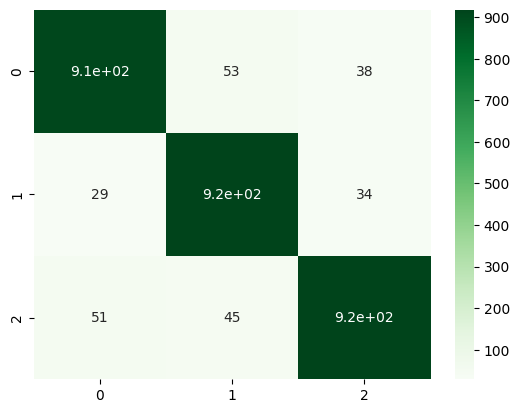

In [37]:
# υπολογισμός μετρικών αξιολόγησης (accuracy, precision, recall, f-score, confusion matrix)
accuracy = accuracy_score(y_test, predictions)
print("Average accuracy: ", accuracy)
cnfm = confusion_matrix(y_test.astype('int32'), predictions)
sns.heatmap(cnfm, annot = True, cmap = "Greens")

MODEL 3

In [21]:
model3.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 25, 1)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 64)                  │          16,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 12)                  │           1,548 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 26,764 (104.55 KB)

 Trainable params: 26,764 (104.55 KB)

 Non-trainable params: 0 (0.00 B)

In [38]:
# -- TRAIN MODEL 3 --------------------------------------------------------------
history3 = model3.fit(train_data,
                    train_label,
                    shuffle=True,
                    epochs=epochs,
                    batch_size=256,
                    validation_data=(val_data, val_label)
                    )

Epoch 1/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 6s 65ms/step - acc: 0.0912 - loss: 2.4809 - val_acc: 0.2599 - val_loss: 2.3992
Epoch 2/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - acc: 0.3078 - loss: 2.3705 - val_acc: 0.4122 - val_loss: 2.2563
Epoch 3/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - acc: 0.4210 - loss: 2.1964 - val_acc: 0.3841 - val_loss: 1.9165
Epoch 4/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - acc: 0.3736 - loss: 1.7377 - val_acc: 0.3413 - val_loss: 1.2046
Epoch 5/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 5s 110ms/step - acc: 0.3940 - loss: 1.1544 - val_acc: 0.4823 - val_loss: 1.0816
Epoch 6/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 62ms/step - acc: 0.4398 - loss: 1.0814 - val_acc: 0.5117 - val_loss: 1.0458
Epoch 7/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - acc: 0.4907 - loss: 1.0451 - val_acc: 0.5585 - val_loss: 0.9960
Epoch 8/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - acc: 0.5425 - loss: 0.9923 - val_acc: 0.6112 - val_loss: 0.9310
Epoch 9/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 72ms/step - a

In [39]:
pred = model3.predict(X_test)
predictions = pred.argmax(axis=-1)

94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step


Average accuracy:  0.8066132264529058


<Axes: >

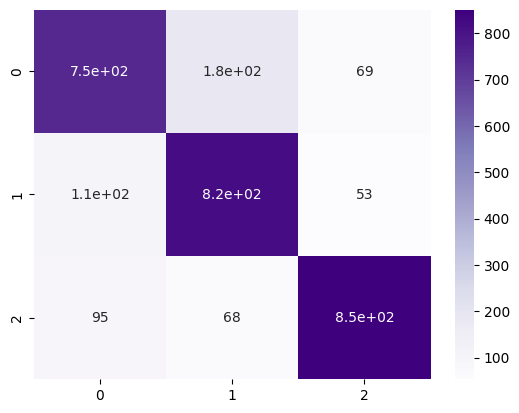

In [40]:
# υπολογισμός μετρικών αξιολόγησης (accuracy, precision, recall, f-score, confusion matrix)
accuracy = accuracy_score(y_test, predictions)
print("Average accuracy: ", accuracy)
cnfm = confusion_matrix(y_test.astype('int32'), predictions)
sns.heatmap(cnfm, annot = True, cmap = "Purples")